<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/Task2_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

housing_data = fetch_california_housing(as_frame=True)
X = housing_data.data
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.9127 - mae: 0.9372 - val_loss: 0.4784 - val_mae: 0.4835
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4286 - mae: 0.4694 - val_loss: 0.4269 - val_mae: 0.4716
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3834 - mae: 0.4407 - val_loss: 0.4092 - val_mae: 0.4452
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5073 - mae: 0.4386 - val_loss: 0.3909 - val_mae: 0.4311
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3646 - mae: 0.4217 - val_loss: 0.3667 - val_mae: 0.4217
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3387 - mae: 0.4069 - val_loss: 0.3664 - val_mae: 0.4188
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3300 - mae: 0.4022 - val_loss: 0.3485 - val_mae: 0.4232
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3216 - mae: 0.3989 - val_loss: 0.3426 - val_mae: 0.4139
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [2]:
# Build a model with more layers and different units
model_tuned = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with a different optimizer
model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the tuned model
history_tuned = model_tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 2.4412 - mae: 0.5631 - val_loss: 0.4281 - val_mae: 0.4732
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3848 - mae: 0.4428 - val_loss: 0.3570 - val_mae: 0.4135
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3626 - mae: 0.4234 - val_loss: 0.3850 - val_mae: 0.4189
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3550 - mae: 0.4193 - val_loss: 0.3386 - val_mae: 0.4246
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3346 - mae: 0.4081 - val_loss: 0.3265 - val_mae: 0.4028
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3198 - mae: 0.3971 - val_loss: 0.4942 - val_mae: 0.4651
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3961 - mae: 0.4111 - val_loss: 0.3149 - val_mae: 0.3867
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3153 - mae: 0.3917 - val_loss: 0.3620 - val_mae: 0.4331
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━

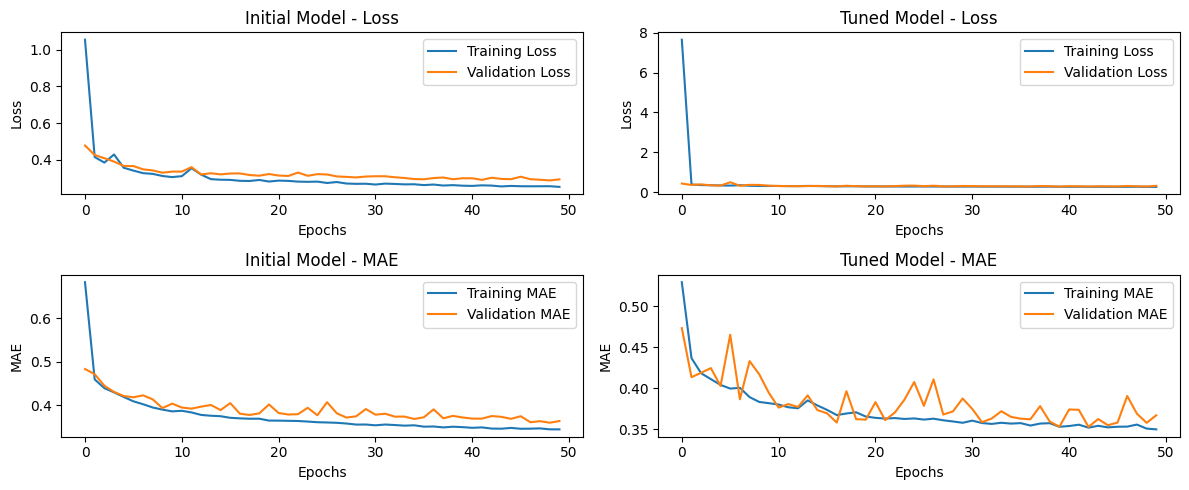

In [3]:
import matplotlib.pyplot as plt

def plot_histories(histories, titles):

    num_models = len(histories)
    plt.figure(figsize=(6 * num_models, 5))

    for i, (history, title) in enumerate(zip(histories, titles)):
        # Plot loss
        plt.subplot(2, num_models, i + 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{title} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot MAE
        plt.subplot(2, num_models, i + 1 + num_models)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title(f'{title} - MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot both histories in a single row
plot_histories([history, history_tuned], ['Initial Model', 'Tuned Model'])

In [4]:
# Build a model with more layers and different units
model_tuned = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with a different optimizer
model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

# Train the tuned model
history_tuned = model_tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.5261 - mae: 0.7292 - val_loss: 0.4719 - val_mae: 0.5092
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4887 - mae: 0.5074 - val_loss: 0.4099 - val_mae: 0.4651
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4205 - mae: 0.4650 - val_loss: 0.3914 - val_mae: 0.4427
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4204 - mae: 0.4680 - val_loss: 0.3621 - val_mae: 0.4394
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4307 - mae: 0.4788 - val_loss: 0.4412 - val_mae: 0.4720
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4504 - mae: 0.4919 - val_loss: 0.4044 - val_mae: 0.4668
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4308 - mae: 0.4829 - val_loss: 0.4226 - val_mae: 0.4596
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4198 - mae: 0.4731 - val_loss: 0.4321 - val_mae: 0.4574
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━

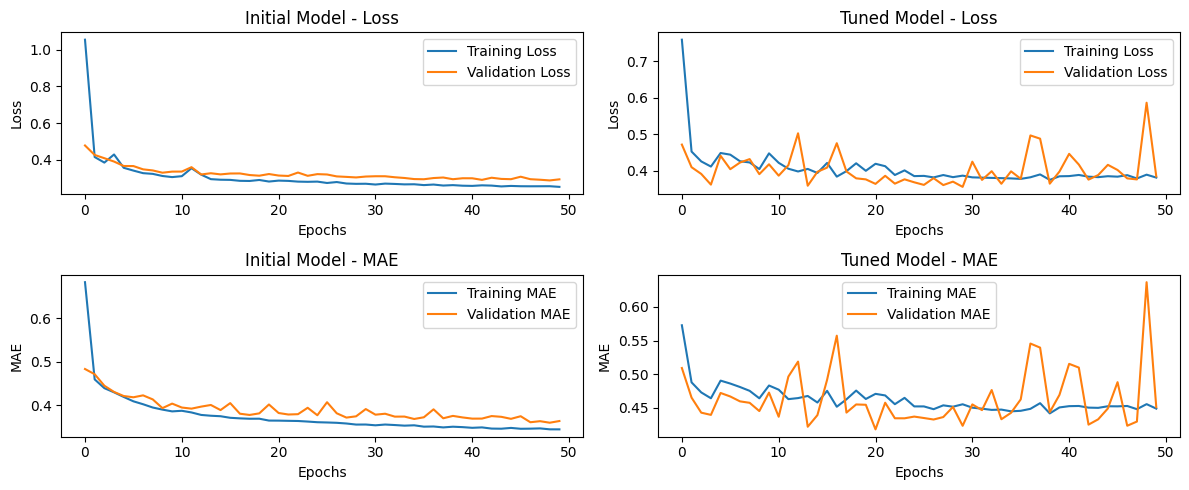

In [5]:
plot_histories([history, history_tuned], ['Initial Model', 'Tuned Model'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint_lr = ModelCheckpoint(
    filepath='best_model_lr.weights.h5',  # Saving weights only with .h5 extension
    save_best_only=True,  # Save only the best model (based on val_loss)
    monitor='val_loss',
    save_weights_only=True,  # Save weights only, not the entire model
    verbose=1
)

# Train the model with callbacks (for saving weights)
history_lr_with_checkpoint = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=50, batch_size=32, callbacks=[model_checkpoint_lr]
)


Epoch 1/50
501/516 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2537 - mae: 0.3457
Epoch 1: val_loss improved from inf to 0.28404, saving model to best_model_lr.weights.h5
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2540 - mae: 0.3458 - val_loss: 0.2840 - val_mae: 0.3638
Epoch 2/50
511/516 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2670 - mae: 0.3507
Epoch 2: val_loss improved from 0.28404 to 0.27969, saving model to best_model_lr.weights.h5
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2670 - mae: 0.3507 - val_loss: 0.2797 - val_mae: 0.3542
Epoch 3/50
507/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2690 - mae: 0.3518
Epoch 3: val_loss did not improve from 0.27969
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2689 - mae: 0.3518 - val_loss: 0.2848 - val_mae: 0.3613
Epoch 4/50
501/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686 - mae: 0.3523
Epoch 4: val_loss improved from 0.27969 to 0.27906, saving model to best_model_lr.weights.h5
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3

In [11]:
model.save('best_model_lr.keras')


In [12]:

from tensorflow.keras.models import load_model

# Load the model (entire model including architecture and weights)
loaded_model_lr = load_model('best_model_lr.keras')

# Evaluate the loaded model
loss, mae = loaded_model_lr.evaluate(X_test, y_test)
print(f'Loaded model MAE: {mae}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2563 - mae: 0.3401
Loaded model MAE: 0.34076282382011414
